In [151]:
import pandas as pd
import numpy as np

In [152]:
df=pd.read_csv("concrete.csv")

In [153]:
df.head(10)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Type,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,B,79.986111
1,540.0,0.0,NaN,162.0,2.5,1055.0,676.0,28,A,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,A,40.269535
3,332.5,142.5,NaN,228.0,0.0,932.0,594.0,365,A,41.052780
4,198.6,132.4,NaN,192.0,0.0,978.4,825.5,360,A,44.296075
5,266.0,114.0,NaN,228.0,0.0,932.0,670.0,90,A,47.029847
6,380.0,95.0,NaN,228.0,0.0,932.0,594.0,365,A,43.698299
7,380.0,95.0,NaN,228.0,0.0,932.0,594.0,28,B,36.447770
8,266.0,114.0,NaN,228.0,0.0,932.0,670.0,28,B,45.854291
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,A,39.289790


In [54]:
df.shape

(1030, 10)

In [55]:
df.isna().sum()

Cement                            9
Blast_Furnace_Slag                0
Fly_Ash                          11
Water                            13
Superplasticizer                  8
Coarse_Aggregate                  0
Fine_Aggregate                    0
Age                               0
Type                              6
Concrete_compressive_strength     0
dtype: int64

In [56]:
df.isna().sum().sum()

47

In [154]:
df.dropna(axis=0,inplace=True)

In [58]:
df.isna().sum()

Cement                           0
Blast_Furnace_Slag               0
Fly_Ash                          0
Water                            0
Superplasticizer                 0
Coarse_Aggregate                 0
Fine_Aggregate                   0
Age                              0
Type                             0
Concrete_compressive_strength    0
dtype: int64

In [59]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Type,Concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,B,79.986111
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,A,40.269535
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,A,39.289790
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,A,28.021684
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,B,42.326932


In [60]:
df["Type"].unique()

array(['B', 'A'], dtype=object)

In [155]:
df = pd.get_dummies(df, prefix_sep='_', columns=["Type"])

In [104]:
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength,Type_A,Type_B
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,1,0
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790,1,0
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.021684,1,0
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.326932,0,1


In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: ylabel='Cement'>

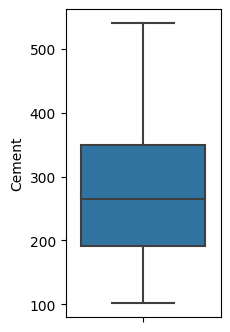

In [157]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.Cement)

<Axes: ylabel='Blast_Furnace_Slag'>

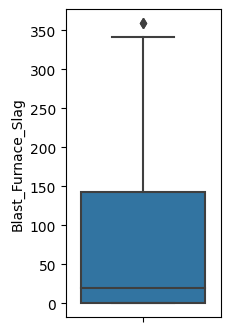

In [158]:
plt.figure(figsize = (2,4))
sns.boxplot(y = df.Blast_Furnace_Slag)


In [159]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [160]:
out_iqr(df,'Age')

The IQR is 49.0
The lower bound value is -66.5
The upper bound value is 129.5
Total number of outliers are 41


In [161]:
df_new = df[(df['Age'] < upper) & (df['Age'] > lower)]

In [162]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 0 to 1029
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         949 non-null    float64
 1   Blast_Furnace_Slag             949 non-null    float64
 2   Fly_Ash                        949 non-null    float64
 3   Water                          949 non-null    float64
 4   Superplasticizer               949 non-null    float64
 5   Coarse_Aggregate               949 non-null    float64
 6   Fine_Aggregate                 949 non-null    float64
 7   Age                            949 non-null    int64  
 8   Concrete_compressive_strength  949 non-null    float64
 9   Type_A                         949 non-null    uint8  
 10  Type_B                         949 non-null    uint8  
dtypes: float64(8), int64(1), uint8(2)
memory usage: 76.0 KB


In [163]:
df_new.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength,Type_A,Type_B
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0,1
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790,1,0
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.021684,1,0
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.326932,0,1
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28,47.813782,0,1


In [128]:
df.shape


(990, 11)

In [127]:
df_new.shape

(949, 11)

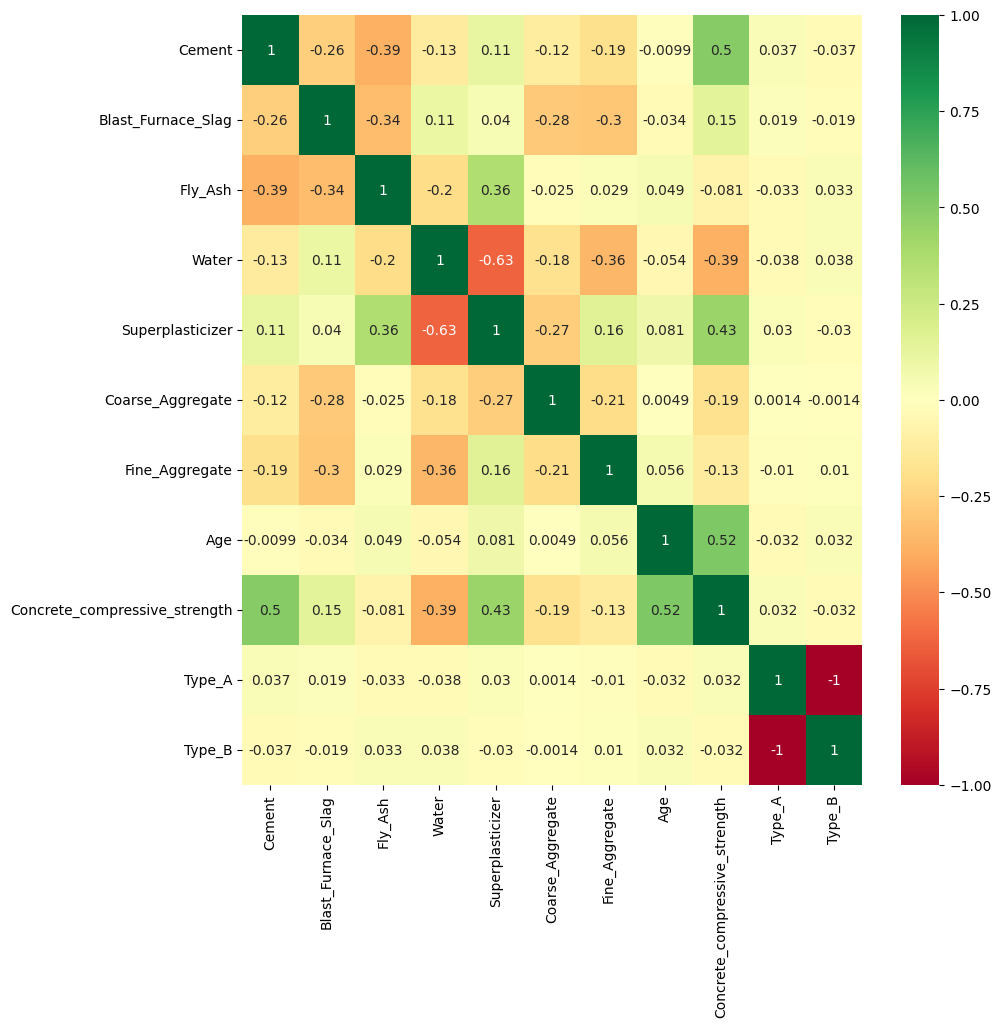

In [118]:
corrmat = df_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [164]:
df_new.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength,Type_A,Type_B
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,0,1
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790,1,0
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.021684,1,0
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.326932,0,1
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28,47.813782,0,1


In [144]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
scaler=MinMaxScaler(feature_range=(0,1))

In [166]:
df_new.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength,Type_A,Type_B
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,276.340569,73.630190,58.812171,179.487935,6.571449,974.201739,778.687619,32.635406,35.237875,0.515279,0.484721
std,103.391526,86.910161,64.600224,19.662515,5.838841,78.715438,75.291315,28.537374,17.014100,0.500030,0.500030
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808,0.000000,0.000000
25%,190.340000,0.000000,0.000000,164.770000,0.000000,932.000000,744.300000,7.000000,22.629981,0.000000,0.000000
50%,255.000000,20.000000,0.000000,182.000000,7.000000,968.000000,780.090000,28.000000,33.488834,1.000000,0.000000
75%,349.000000,145.000000,118.600000,192.000000,10.370000,1038.000000,825.000000,28.000000,45.698469,1.000000,1.000000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,120.000000,82.599225,1.000000,1.000000


In [167]:
"Cement","Blast_Furnace_Slag",	"Fly_Ash" ,"Water",	"Superplasticizer",	"Coarse_Aggregate",	"Fine_Aggregate"
df_new[["Cement","Blast_Furnace_Slag",	"Fly_Ash" ,"Water",	"Superplasticizer",	"Coarse_Aggregate",	"Fine_Aggregate","Age","Concrete_compressive_strength"]] =scaler.fit_transform(df_new[["Cement","Blast_Furnace_Slag","Fly_Ash" ,"Water","Superplasticizer",	"Coarse_Aggregate",	"Fine_Aggregate","Age","Concrete_compressive_strength"]])

/var/folders/09/pyncs5v10690_f686x0v532h0000gn/T/ipykernel_18676/825680612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[["Cement","Blast_Furnace_Slag",	"Fly_Ash" ,"Water",	"Superplasticizer",	"Coarse_Aggregate",	"Fine_Aggregate","Age","Concrete_compressive_strength"]] =scaler.fit_transform(df_new[["Cement","Blast_Furnace_Slag","Fly_Ash" ,"Water","Superplasticizer",	"Coarse_Aggregate",	"Fine_Aggregate","Age","Concrete_compressive_strength"]])


In [168]:
df_new.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive_strength,Type_A,Type_B
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.226891,0.967445,0,1
9,0.851598,0.000000,0.0,0.848303,0.00000,0.380814,0.000000,0.226891,0.460436,1,0
11,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.226891,0.320054,1,0
13,0.200913,0.528659,0.0,0.848303,0.00000,0.380814,0.190667,0.747899,0.498273,0,1
14,0.461187,0.211464,0.0,0.848303,0.00000,0.380814,0.190667,0.226891,0.566631,0,1


In [170]:
X=df_new.drop(['Concrete_compressive_strength'],axis=1)
y=df_new['Concrete_compressive_strength']

In [169]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [171]:
#apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=f_regression, k=5)
data = bestfeatures.fit_transform(X,y)
data


array([[1.        , 0.32135729, 0.07763975, 0.69476744, 0.22689076],
       [0.85159817, 0.84830339, 0.        , 0.38081395, 0.22689076],
       [0.22054795, 0.56087824, 0.        , 0.51569767, 0.22689076],
       ...,
       [0.10616438, 0.56646707, 0.18944099, 0.26569767, 0.22689076],
       [0.1303653 , 0.42994012, 0.35093168, 0.54825581, 0.22689076],
       [0.36278539, 0.62954092, 0.26708075, 0.18459302, 0.22689076]])

In [172]:
new_data=pd.DataFrame(df_new,columns=X.columns[bestfeatures.get_support()])
new_data.head()

,Cement,Water,Superplasticizer,Coarse_Aggregate,Age
0,1.000000,0.321357,0.07764,0.694767,0.226891
9,0.851598,0.848303,0.00000,0.380814,0.226891
11,0.220548,0.560878,0.00000,0.515698,0.226891
13,0.200913,0.848303,0.00000,0.380814,0.747899
14,0.461187,0.848303,0.00000,0.380814,0.226891


In [173]:
X.columns[bestfeatures.get_support()]

Index(['Cement', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Age'], dtype='object')

In [174]:
pd.DataFrame(bestfeatures.scores_,columns=['Score'])

,Score
0,311.435979
1,21.274133
2,6.190638
3,167.988717
4,217.538801
5,33.609975
6,15.484626
7,350.977625
8,0.972112
9,0.972112


In [175]:
Summary=pd.concat([pd.DataFrame(X.columns,columns=['Features']),pd.DataFrame(bestfeatures.scores_,columns=['Score'])],axis=1)

In [176]:
Summary.sort_values(by=['Score'])

,Features,Score
8,Type_A,0.972112
9,Type_B,0.972112
2,Fly_Ash,6.190638
6,Fine_Aggregate,15.484626
1,Blast_Furnace_Slag,21.274133
5,Coarse_Aggregate,33.609975
3,Water,167.988717
4,Superplasticizer,217.538801
0,Cement,311.435979
7,Age,350.977625


In [180]:
new_data.head()

,Cement,Water,Superplasticizer,Coarse_Aggregate,Age
0,1.000000,0.321357,0.07764,0.694767,0.226891
9,0.851598,0.848303,0.00000,0.380814,0.226891
11,0.220548,0.560878,0.00000,0.515698,0.226891
13,0.200913,0.848303,0.00000,0.380814,0.747899
14,0.461187,0.848303,0.00000,0.380814,0.226891


In [179]:
y.head()

0     0.967445
9     0.460436
11    0.320054
13    0.498273
14    0.566631
Name: Concrete_compressive_strength, dtype: float64

In [181]:
from sklearn.linear_model import LinearRegression

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [190]:
x_train, x_test,y_train,y_test = train_test_split(new_data,y,test_size =0.2)
# print the data

In [191]:
model = LinearRegression()
regression = model.fit(x_train, y_train)
regression.score(X=x_test, y=y_test)


0.6875170657242419

In [192]:
x_train.head()

,Cement,Water,Superplasticizer,Coarse_Aggregate,Age
260,0.252443,0.300200,0.322050,0.589535,0.109244
57,0.220548,0.560878,0.000000,0.515698,0.016807
614,0.399543,0.552894,0.000000,0.485465,0.747899
309,0.442260,0.397525,0.275466,0.448081,0.016807
177,0.594977,0.344511,0.360248,0.417733,0.756303


In [198]:
y_pred = model.predict(pd.DataFrame([[0.252443,0.300200,0.322050,0.589535,0.109244]]))


print(y_pred)

[0.34939055]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
